In [1]:
#!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

In [3]:
articles = pd.read_csv('../h-and-m-personalized-fashion-recommendations/articles.csv')

In [4]:
customers = pd.read_csv('../h-and-m-personalized-fashion-recommendations/customers.csv')
transactions = pd.read_csv('../h-and-m-personalized-fashion-recommendations/transactions_train.csv')

In [5]:
print(articles.shape, customers.shape, transactions.shape)

(105542, 25) (1371980, 7) (31788324, 5)


### 1. ARTICLES

In [6]:
pd.set_option('display.max_columns', 50)
articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [7]:
len(set(articles['index_name'])), articles.shape, len(set(articles['article_id']))

(10, (105542, 25), 105542)

In [8]:
articles['index_name'].value_counts()

Ladieswear                        26001
Divided                           15149
Menswear                          12553
Children Sizes 92-140             12007
Children Sizes 134-170             9214
Baby Sizes 50-98                   8875
Ladies Accessories                 6961
Lingeries/Tights                   6775
Children Accessories, Swimwear     4615
Sport                              3392
Name: index_name, dtype: int64

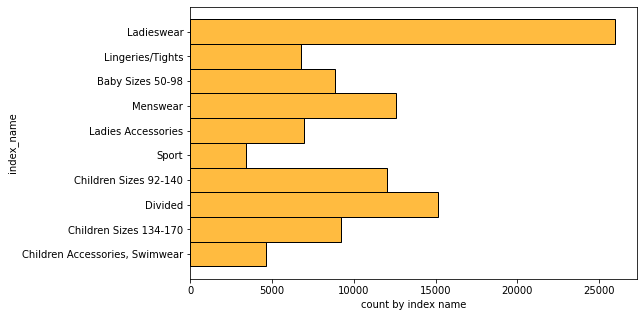

In [9]:
f, ax = plt.subplots(figsize = (8,5))
ax = sns.histplot(articles, y = 'index_name', color = 'orange')
ax.set_xlabel('count by index name')
ax.set_ylabel('index_name')
plt.show()

In [10]:
len(set(articles['garment_group_name'])), len(set(articles['index_group_name'])) 

(21, 5)

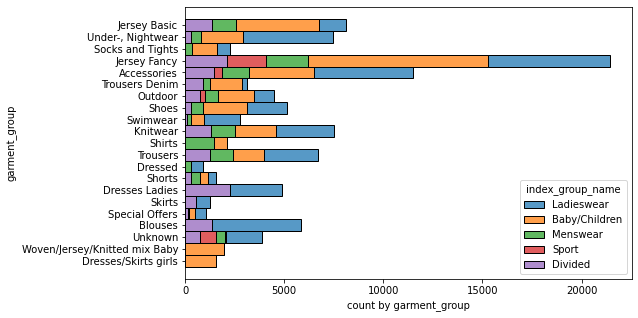

In [11]:
f, ax = plt.subplots(figsize = (8,5))
ax = sns.histplot(articles, y = 'garment_group_name', color = 'orange', hue = 'index_group_name', multiple = 'stack')
ax.set_xlabel('count by garment_group')
ax.set_ylabel('garment_group')
plt.show()

In [12]:
articles.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

In [13]:
pd.options.display.max_rows = None
articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

In [14]:
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [15]:
for col in articles.columns:
    if not 'no' in col and not 'id' in col and not 'code' in col:
        n_value = articles[col].nunique()
        print(f'number of unique values in {col}: {n_value}')

number of unique values in prod_name: 45875
number of unique values in product_type_name: 131
number of unique values in product_group_name: 19
number of unique values in graphical_appearance_name: 30
number of unique values in colour_group_name: 50
number of unique values in perceived_colour_value_name: 8
number of unique values in perceived_colour_master_name: 20
number of unique values in department_name: 250
number of unique values in index_name: 10
number of unique values in index_group_name: 5
number of unique values in section_name: 56
number of unique values in garment_group_name: 21
number of unique values in detail_desc: 43404


### 2. CUSTOMERS

In [16]:
customers.head(3)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...


In [17]:
customers.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

In [18]:
customers['customer_id'].nunique(), customers.shape

(1371980, (1371980, 7))

In [19]:
customers.shape[0] - customers['customer_id'].nunique()

0

In [20]:
customers.groupby(['FN']).count()['customer_id']

FN
1.0    476930
Name: customer_id, dtype: int64

In [21]:
sum(customers['FN'].isnull())

895050

In [22]:
customers.groupby(['Active']).count()['customer_id']

Active
1.0    464404
Name: customer_id, dtype: int64

In [23]:
data_postal = customers.groupby('postal_code', as_index=False).count().sort_values('customer_id', ascending = False)

In [24]:
data_postal.head()

,postal_code,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303,42874,39886,118281,114377,118002
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261,109,104,261,261,260
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159,90,88,159,159,158
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157,55,54,157,156,156
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156,42,41,156,156,155


In [25]:
data_postal.shape, customers['postal_code'].nunique()

((352899, 7), 352899)

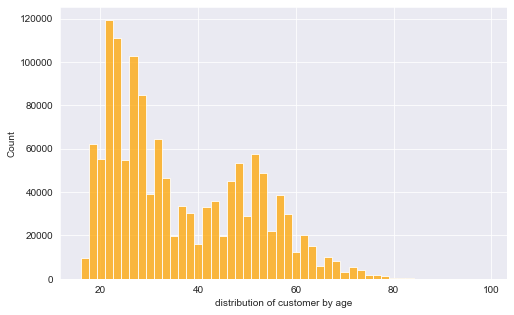

In [26]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize = (8,5))
ax = sns.histplot(customers, x = 'age', color = 'orange', bins = 50)
ax.set_xlabel('distribution of customer by age')
plt.show()

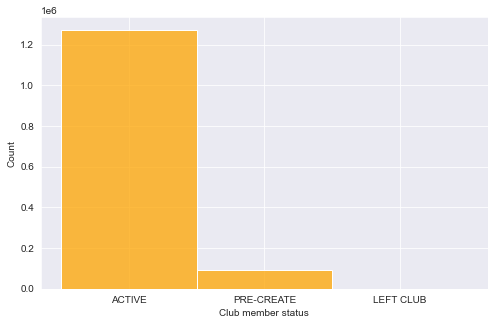

In [27]:
f, ax = plt.subplots(figsize = (8,5))
ax = sns.histplot(customers, x = 'club_member_status', color = 'orange')
ax.set_xlabel('Club member status')
plt.show()

In [28]:
customers['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

In [29]:
customers['FN'].unique(), customers['Active'].unique(), customers['club_member_status'].unique()

(array([nan,  1.]),
 array([nan,  1.]),
 array(['ACTIVE', nan, 'PRE-CREATE', 'LEFT CLUB'], dtype=object))

For the features 'fashion_news_frequency' there are three kinds of values for NaN, we need to unite them.

In [30]:
customers.groupby('fashion_news_frequency').count()['customer_id']

fashion_news_frequency
Monthly         842
NONE         877711
None              2
Regularly    477416
Name: customer_id, dtype: int64

In [31]:
customers.loc[~customers['fashion_news_frequency'].isin(['Regularly', 'Monthly']), 'fashion_news_frequency'] = 'None'

In [32]:
customers.groupby('fashion_news_frequency').count()['customer_id']

fashion_news_frequency
Monthly         842
None         893722
Regularly    477416
Name: customer_id, dtype: int64

In [33]:
pie_data = customers[['customer_id', 'fashion_news_frequency']].groupby('fashion_news_frequency').count()

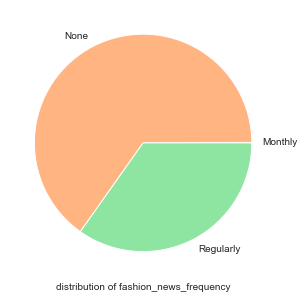

In [34]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize = (10,5))
ax.pie(pie_data.customer_id, labels = pie_data.index, colors =  sns.color_palette('pastel'))
ax.set_facecolor('lightgrey')
ax.set_xlabel('distribution of fashion_news_frequency')
plt.show()

### 3. Transactions

In [35]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [36]:
pd.set_option('display.float_format', '{:.4f}'.format)

transactions.describe()['price']

count   31788324.0000
mean           0.0278
std            0.0192
min            0.0000
25%            0.0158
50%            0.0254
75%            0.0339
max            0.5915
Name: price, dtype: float64

In [37]:
## top 10 customers
transactions_bycus = transactions.groupby('customer_id').count() 
transactions_bycus.head()

,t_dat,article_id,price,sales_channel_id
customer_id,,,,
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d25f88aa139fdfc657,21,21,21,21
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,86,86,86,86
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,18,18,18,18
00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2c5feb1ca5dff07c43e,2,2,2,2
00006413d8573cd20ed7128e53b7b13819fe5cfc2d801fe7fc0f26dd8d65a85a,13,13,13,13


In [38]:
transactions_bycus.sort_values(by = 't_dat', ascending = False)['t_dat'][:10]

customer_id
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d    1208
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa    1170
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076    1169
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296    1157
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55    1143
Name: t_dat, dtype: int64

We detect outliers in price.

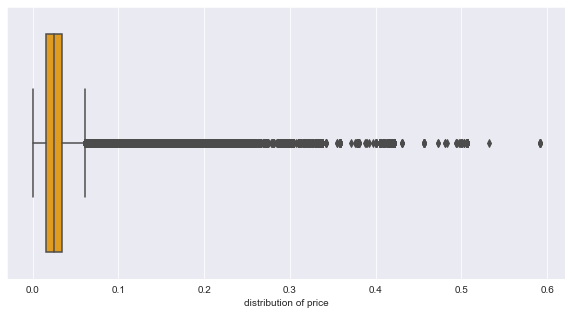

In [39]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize = (10,5))
ax = sns.boxplot(data = transactions, x = 'price',  color = 'orange')
ax.set_xlabel('distribution of price')
plt.show()

Now we compare prices inside groups is more accurate, because accessories and trousers prices may vary largerly. We choose some columns from articles and merge it to transactions.

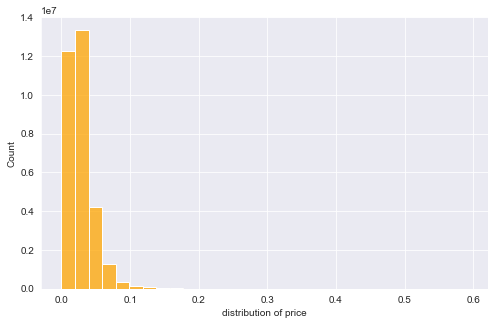

In [40]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize = (8,5))
ax = sns.histplot(transactions, x = 'price', color = 'orange', bins = 30)
ax.set_xlabel('distribution of price')
plt.show()

In [41]:
articles_for_merge = articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name', 'garment_group_name']]

merge_df = transactions[['customer_id', 't_dat', 'article_id', 'price']].merge(articles_for_merge, on = 'article_id', how = 'left')

In [42]:
merge_df.shape

(31788324, 9)

In [43]:
transactions.shape


(31788324, 5)

MemoryError: 

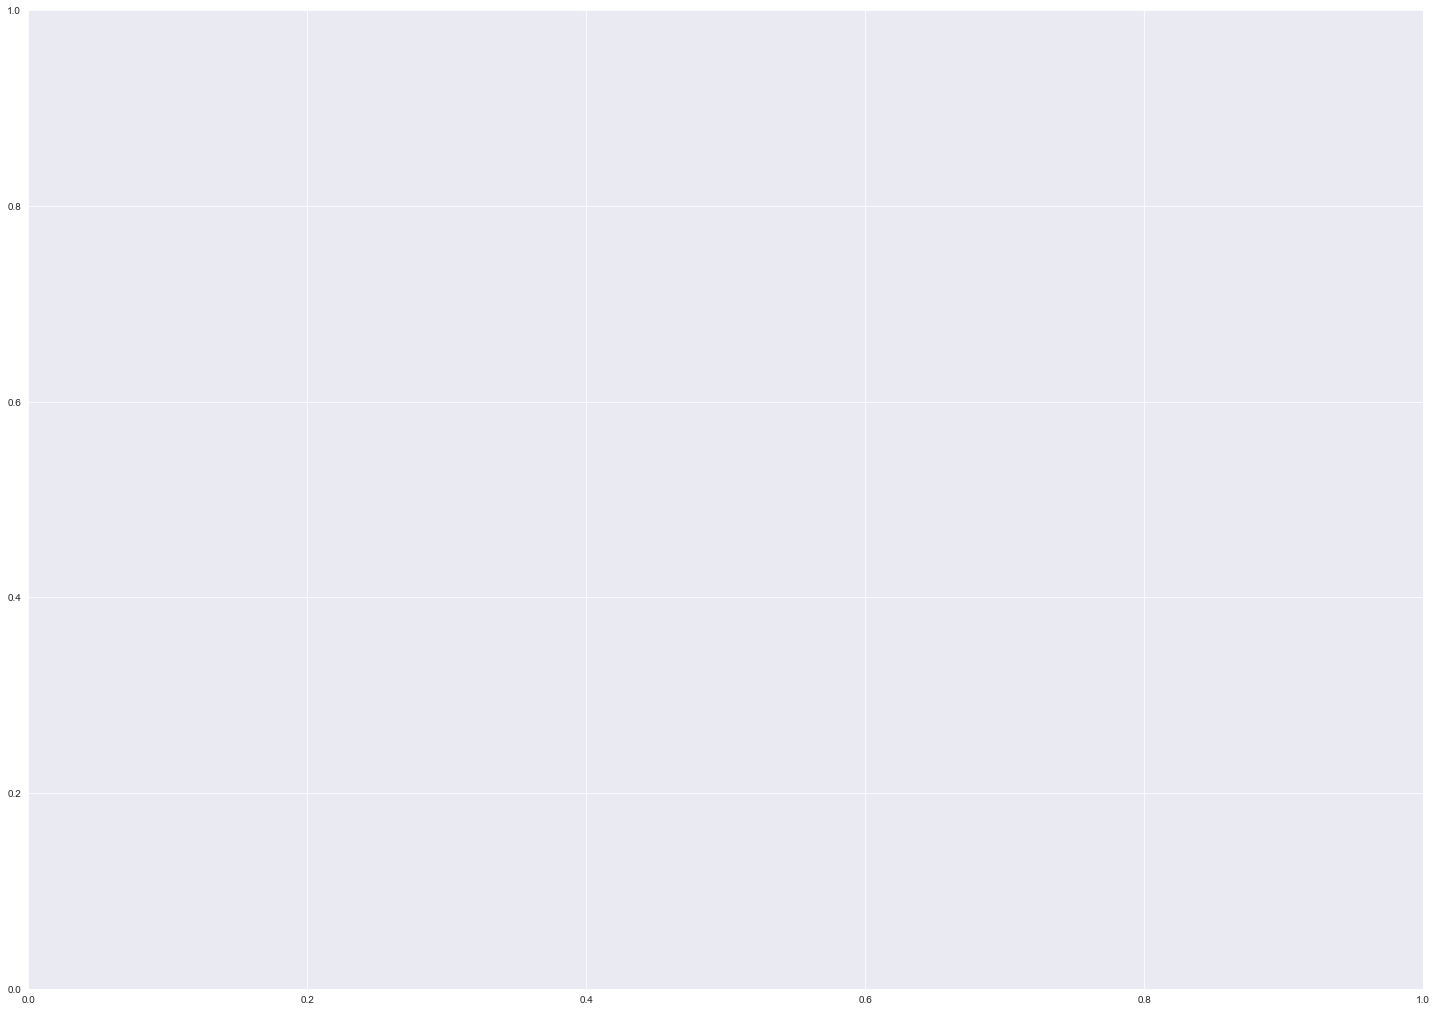

In [44]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
ax = sns.boxplot(data=merge_df, x='price', y='product_group_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)
plt.show()